In [1]:
#%matplotlib notebook
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

from scipy.stats import norm
from scipy.stats import t
from scipy.stats import chi2

import os
import os.path as path
import wget

In [2]:
if not path.exists('Data'):
    os.mkdir('Data')
    
!rm Data/*

file = 'Data/Minimos.dat'
#url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/MinimosLineal.txt'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/MinimosCuadratico.txt'

if not path.exists(file):
    Path_ = wget.download(url,file)
    print('File loaded')
else:
    Path_ = file

100% [..................................................................................] 521 / 521File loaded


In [3]:
data = np.loadtxt(Path_)
x = data[:,0]
y = data[:,1]

In [4]:
# Agregamos ruido
N = len(x)
sigma = np.random.uniform(0,20.,size=N)
sigma

array([11.17378572,  3.62143943, 10.23485775, 19.85761885, 19.02350165,
        2.61729273,  5.37162375,  6.44510547,  5.23949143,  4.60556984,
        6.30790015, 19.03833204,  5.95022555, 14.40869693,  1.0963799 ,
        5.99072287, 17.74703538, 19.45167051,  9.27307693,  0.57713604])

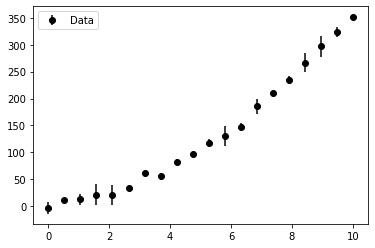

In [5]:
#plt.scatter(x,y)
plt.errorbar(x,y,yerr=sigma,fmt='o',color='k',label='Data')
plt.legend(loc=0)

In [6]:
def GetFit(x,y,n=1):
    
    l = x.shape[0]
    b = y
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
        
    AT = np.dot(A.T,A)
    bT = np.dot(A.T,b)

    xsol = np.linalg.solve(AT,bT)
    
    return xsol

In [47]:
# Grado polinomial
n = 5
param = GetFit(x,y,n)
param

array([-1.50605855e-01,  9.53277250e+00,  2.06614775e+00, -1.71529601e-01,
        5.99163451e-02, -3.77282827e-03])

In [48]:
def GetModel(x,p):
    
    y = 0.
    for i in range(len(p)):
        y += p[i]*x**i
        
    return y

In [49]:
X = sym.Symbol('x',real=True)
GetModel(X,param)

-0.00377282826618552*x**5 + 0.0599163450572589*x**4 - 0.171529600935282*x**3 + 2.06614774759259*x**2 + 9.53277250111673*x - 0.150605854889703

In [50]:
_x = np.linspace(np.min(x),np.max(x),50)
_y = GetModel(_x,param)

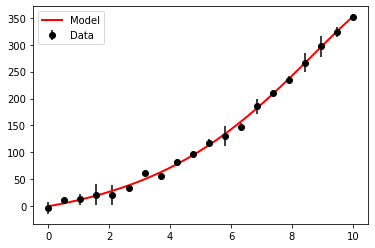

In [51]:
plt.errorbar(x,y,yerr=sigma,fmt='o',color='k',label='Data')
plt.plot(_x,_y,color='r',lw=2,label='Model')
plt.legend()

In [52]:
def GetError(x,y,p):
    
    l = x.shape[0]
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
        
    # Residuos
    R = y - np.dot(A,p)
    
    sigma2 = np.dot(R.T,R)/(len(y)-len(p))
    
    Cov = sigma2*np.linalg.inv(np.dot(A.T,A))
    
    print(sigma2)
    
    return Cov

In [53]:
Cov = GetError(x,y,param)
Cov

33.1350373326569


array([[ 2.80586976e+01, -4.60993854e+01,  2.35866262e+01,
        -5.13610437e+00,  4.99237414e-01, -1.78360029e-02],
       [-4.60993854e+01,  1.36552718e+02, -8.64880908e+01,
         2.10815672e+01, -2.19790192e+00,  8.23688191e-02],
       [ 2.35866262e+01, -8.64880908e+01,  5.97785736e+01,
        -1.53356149e+01,  1.65417375e+00, -6.35199973e-02],
       [-5.13610437e+00,  2.10815672e+01, -1.53356149e+01,
         4.06467144e+00, -4.48657061e-01,  1.75278370e-02],
       [ 4.99237414e-01, -2.19790192e+00,  1.65417375e+00,
        -4.48657061e-01,  5.03724463e-02, -1.99397558e-03],
       [-1.78360029e-02,  8.23688191e-02, -6.35199973e-02,
         1.75278370e-02, -1.99397558e-03,  7.97590230e-05]])

In [54]:
param

array([-1.50605855e-01,  9.53277250e+00,  2.06614775e+00, -1.71529601e-01,
        5.99163451e-02, -3.77282827e-03])

In [55]:
a3 = param[-1]
a3

-0.003772828266185522

In [56]:
sigmaa3 = np.sqrt(Cov[-1,-1])
sigmaa3

0.008930790724960643

In [57]:
tobs = np.abs((0. - np.abs(a3)))/sigmaa3
tobs

0.42245176069805945

In [58]:
df = N - len(param) - 1
df

13

In [59]:
tcritico = t.ppf(0.975,df=df)
tcritico

2.1603686564610127